In [426]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as mp
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline


In [376]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\user_behavior_dataset.csv")

In [377]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [378]:
df.describe()


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [380]:
df.sum()

User ID                                                                  245350
Device Model                  Google Pixel 5OnePlus 9Xiaomi Mi 11Google Pixe...
Operating System              AndroidAndroidAndroidAndroidiOSAndroidAndroidA...
App Usage Time (min/day)                                                 189790
Screen On Time (hours/day)                                               3690.9
Battery Drain (mAh/day)                                                 1067611
Number of Apps Installed                                                  35477
Data Usage (MB/day)                                                      650820
Age                                                                       26938
Gender                        MaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMa...
User Behavior Class                                                        2093
dtype: object

In [412]:
df_group = df.groupby(['Device Model','Gender']).agg('sum',['mean'])
df_group

User ID  App Usage Time (min/day)  \
Device Model       Gender                                      
Google Pixel 5     Female    24276                     17436   
                   Male      25180                     20590   
OnePlus 9          Female    21212                     16221   
                   Male      25742                     19740   
Samsung Galaxy S21 Female    18846                     15664   
                   Male      29721                     19770   
Xiaomi Mi 11       Female    25257                     20902   
                   Male      23635                     18292   
iPhone 12          Female    26816                     21158   
                   Male      24665                     20017   

                           Screen On Time (hours/day)  \
Device Model       Gender                               
Google Pixel 5     Female                       326.9   
                   Male                         393.9   
OnePlus 9          Female                       314.4   
                   Male                         382.7   
Samsung Galaxy S21 Female                       302.7   
                   Male                         404.6   
Xiaomi Mi 11       Female                       418.4   
                   Male                         354.4   
iPhone 12          Female                       405.4   
                   Male                         387.5   

                           Battery Drain (mAh/day)  Number of Apps Installed  \
Device Model       Gender                                                      
Google Pixel 5     Female                    97667                      3263   
                   Male                     111879                      3824   
OnePlus 9          Female                    90990                      2942   
                   Male                     111682                      3704   
Samsung Galaxy S21 Female                    85257                      2881   
                   Male                     114851                      3876   
Xiaomi Mi 11       Female                   118175                      3876   
                   Male                     105041                      3413   
iPhone 12          Female                   118569                      3914   
                   Male                     113500                      3784   

                           Data Usage (MB/day)   Age  User Behavior Class  
Device Model       Gender                                                  
Google Pixel 5     Female                57553  2609                  193  
                   Male                  69921  2754                  221  
OnePlus 9          Female                52605  2440                  177  
                   Male                  68574  2731                  219  
Samsung Galaxy S21 Female                53616  1994                  171  
                   Male                  70323  3208                  225  
Xiaomi Mi 11       Female                71593  2964                  231  
                   Male                  65671  2550                  203  
iPhone 12          Female                71845  2894                  233  
                   Male                  69119  2794                  220

<Axes: xlabel='Device Model,Gender'>

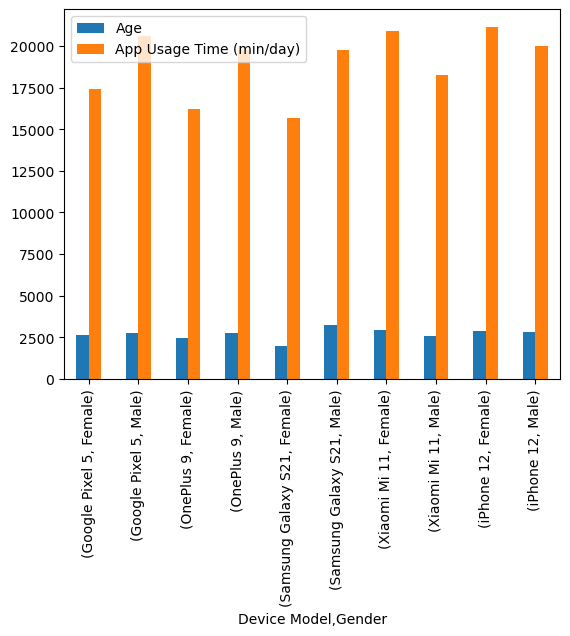

In [394]:
df_group.plot(kind ='bar')


In [414]:
df_time = df.groupby(['App Usage Time (min/day)','Age']).agg(['sum','min','max'])
df_time

User ID                  Device Model  \
                                 sum  min  max                 sum   
App Usage Time (min/day) Age                                         
30                       34      338  338  338  Samsung Galaxy S21   
                         35      245  245  245           OnePlus 9   
                         45      356  356  356  Samsung Galaxy S21   
31                       50       74   74   74        Xiaomi Mi 11   
32                       20       36   36   36  Samsung Galaxy S21   
...                              ...  ...  ...                 ...   
594                      56      655  655  655      Google Pixel 5   
595                      30      167  167  167      Google Pixel 5   
597                      26      342  342  342           iPhone 12   
                         34      185  185  185        Xiaomi Mi 11   
598                      58      368  368  368           OnePlus 9   

                                                                      \
                                             min                 max   
App Usage Time (min/day) Age                                           
30                       34   Samsung Galaxy S21  Samsung Galaxy S21   
                         35            OnePlus 9           OnePlus 9   
                         45   Samsung Galaxy S21  Samsung Galaxy S21   
31                       50         Xiaomi Mi 11        Xiaomi Mi 11   
32                       20   Samsung Galaxy S21  Samsung Galaxy S21   
...                                          ...                 ...   
594                      56       Google Pixel 5      Google Pixel 5   
595                      30       Google Pixel 5      Google Pixel 5   
597                      26            iPhone 12           iPhone 12   
                         34         Xiaomi Mi 11        Xiaomi Mi 11   
598                      58            OnePlus 9           OnePlus 9   

                             Operating System                    \
                                          sum      min      max   
App Usage Time (min/day) Age                                      
30                       34           Android  Android  Android   
                         35           Android  Android  Android   
                         45           Android  Android  Android   
31                       50           Android  Android  Android   
32                       20           Android  Android  Android   
...                                       ...      ...      ...   
594                      56           Android  Android  Android   
595                      30           Android  Android  Android   
597                      26               iOS      iOS      iOS   
                         34           Android  Android  Android   
598                      58           Android  Android  Android   

                             Screen On Time (hours/day)  ...  \
                                                    sum  ...   
App Usage Time (min/day) Age                             ...   
30                       34                         1.3  ...   
                         35                         1.3  ...   
                         45                         1.9  ...   
31                       50                         1.1  ...   
32                       20                         1.2  ...   
...                                                 ...  ...   
594                      56                        10.5  ...   
595                      30                        11.3  ...   
597                      26                        10.3  ...   
                         34                        10.4  ...   
598                      58                        11.2  ...   

                             Number of Apps Installed Data Usage (MB/day)  \
                                                  max                 sum   
App Usage Time (min/day) Age                     

<Axes: xlabel='Age'>

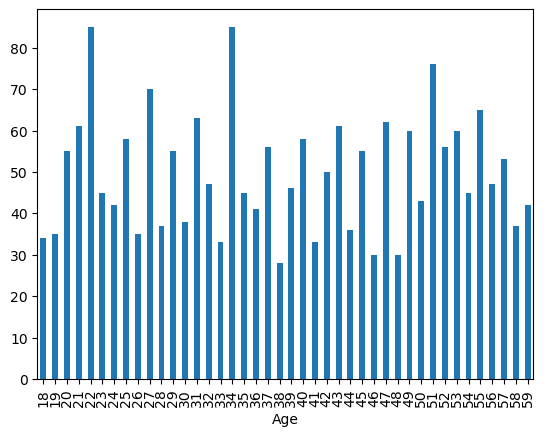

In [307]:
plr = df.groupby('Age')['User Behavior Class'].sum()
plr.plot(kind='bar', style= "logx")

<Axes: ylabel='Data Usage (MB/day)'>

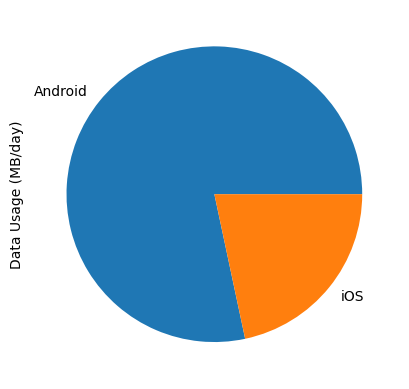

In [323]:
pl = df.groupby('Operating System')['Data Usage (MB/day)'].sum()
pl.plot(kind='pie', color='g')

In [400]:
Endurance = df.groupby('Device Model')['Battery Drain (mAh/day)'].sum()

<Axes: ylabel='Device Model'>

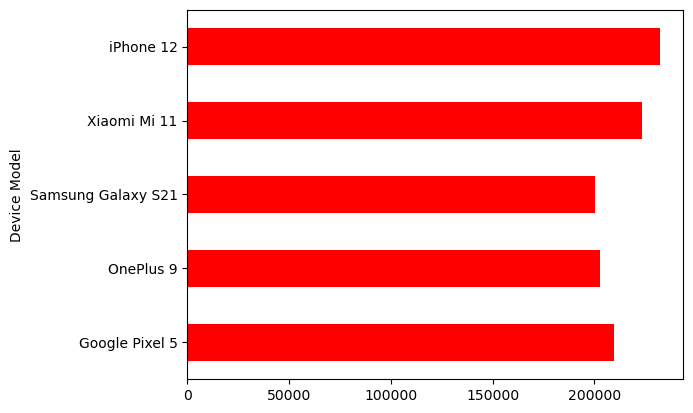

In [398]:
Endurance.plot(kind='barh', color='red')

In [221]:
import pandas as pd
df_path = r"C:\Users\Lenovo\OneDrive\Desktop\user_behavior_dataset.csv"
df_data = pd.read_csv(df_path)
df_data.columns
df_data.head(700)
y=df_data.Age
x=['Number of Apps Installed','App Usage Time (min/day)','Battery Drain (mAh/day)']
x = df_data[x]
from sklearn.tree import DecisionTreeRegressor
x_model = DecisionTreeRegressor(random_state=50)
x_model.fit(x, y)
print(x.head())
print(x_model.predict(x.head()))


   Number of Apps Installed  App Usage Time (min/day)  Battery Drain (mAh/day)
0                        67                       393                     1872
1                        42                       268                     1331
2                        32                       154                      761
3                        56                       239                     1676
4                        58                       187                     1367
[40. 47. 42. 20. 31.]


<Axes: ylabel='Density'>

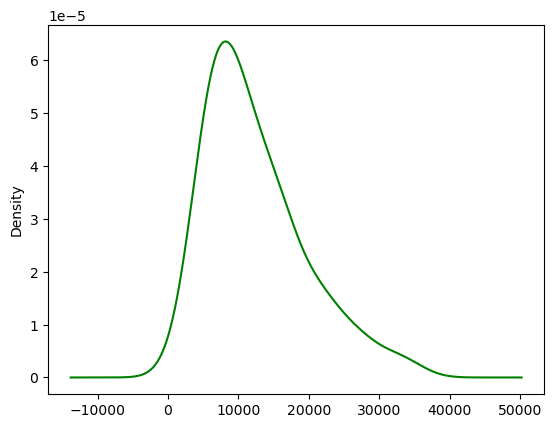

In [225]:
Endurance2 = df.groupby('Number of Apps Installed')['Battery Drain (mAh/day)'].sum()
Endurance2.plot(kind='kde', color='g')